<a href="https://colab.research.google.com/github/manassanant132/Time_Series/blob/main/GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,GRU,Dense,Dropout

df = pd.read_csv('https://raw.githubusercontent.com/alfredoandere/ML/master/Project1_DOJ30/stock-time-series-20050101-to-20171231/IBM_2006-01-01_to_2018-01-01.csv',index_col='Date')
df.index = pd.to_datetime(df.index)
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


<function matplotlib.pyplot.show(close=None, block=None)>

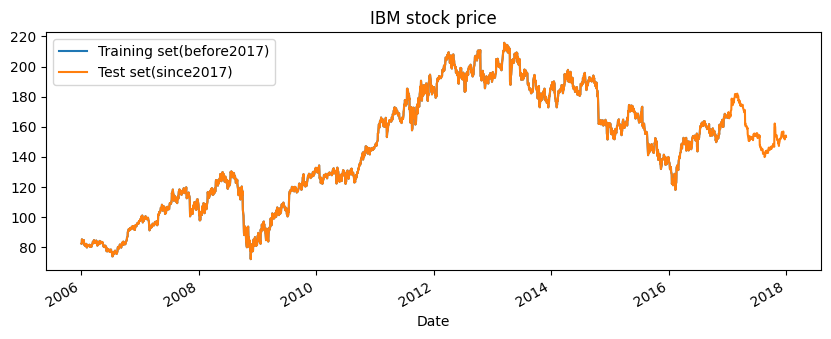

In [ ]:
df.isnull().sum()

df=df.Close
df.head()

df[:'2016'].plot(figsize=(10,3.5),legend=True)
df[:'2017'].plot(figsize=(10,3.5),legend=True)
plt.legend(['Training set(before2017)','Test set(since2017)'])
plt.title('IBM stock price')
plt.show

In [ ]:
print('Samples:',df.shape)
print('Train set:',df[:'2016'].shape)

Samples: (3020,)
Train set: (2769,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

data = df.values.reshape(-1,1)
sc=MinMaxScaler()
data_sc = sc.fit_transform(data)

In [ ]:
data

array([[ 82.06],
       [ 81.95],
       [ 82.5 ],
       ...,
       [153.13],
       [154.04],
       [153.42]])

In [ ]:
def convertToMetrix(data,step=1):
  X,Y=[],[]
  for i in range(len(data)-step):
    d=i+step
    X.append(data[i:d,])
    Y.append(data[d,])
  return np.array(X),np.array(Y)

n_train = 2769

train,test = data_sc[0:n_train],data_sc[n_train:]
train.shape,test.shape

((2769, 1), (251, 1))

In [ ]:
step = 60
X_train,y_train = convertToMetrix(train,step)
X_test,y_test = convertToMetrix(test,step)

print('X_Train,Test(after conversatiob):',X_train.shape,X_test.shape)
print('y_Train,Test(after conversatiob):',y_train.shape,y_test.shape)

X_Train,Test(after conversatiob): (2709, 60, 1) (191, 60, 1)
y_Train,Test(after conversatiob): (2709, 1) (191, 1)


In [ ]:
model = Sequential()
model.add(GRU(units=50,return_sequences=True,input_shape=(step,1),activation='relu'))
model.add(Dropout(0.2))
model.add(GRU(units=40,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error',optimizer='rmsprop')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 60, 50)            7950      
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 gru_3 (GRU)                 (None, 40)                11040     
                                                                 
 dropout_3 (Dropout)         (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 19031 (74.34 KB)
Trainable params: 19031 (74.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history =  model.fit(X_train,y_train,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
85/85 [==============================] - 7s 53ms/step - loss: 0.0321
Epoch 2/50
85/85 [==============================] - 4s 46ms/step - loss: 0.0073
Epoch 3/50
85/85 [==============================] - 4s 48ms/step - loss: 0.0057
Epoch 4/50
85/85 [==============================] - 7s 79ms/step - loss: 0.0056
Epoch 5/50
85/85 [==============================] - 5s 59ms/step - loss: 0.0050
Epoch 6/50
85/85 [==============================] - 5s 54ms/step - loss: 0.0044
Epoch 7/50
85/85 [==============================] - 6s 68ms/step - loss: 0.0044
Epoch 8/50
85/85 [==============================] - 5s 63ms/step - loss: 0.0041
Epoch 9/50
85/85 [==============================] - 6s 75ms/step - loss: 0.0038
Epoch 10/50
85/85 [==============================] - 8s 100ms/step - loss: 0.0036
Epoch 11/50
85/85 [==============================] - 7s 83ms/step - loss: 0.0039
Epoch 12/50
85/85 [==============================] - 5s 54ms/step - loss: 0.0034
Epoch 13/50
85/85 [=================

<function matplotlib.pyplot.show(close=None, block=None)>

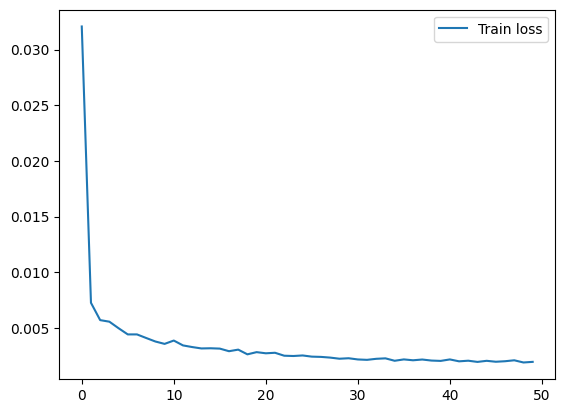

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.legend()
plt.show

In [ ]:
testPredict = model.predict(X_test)

6/6 [==============================] - 0s 12ms/step


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

testPredict_inv = sc.inverse_transform(testPredict)
y_test_inv = sc.inverse_transform(y_test)

r2_test = r2_score(y_test_inv,testPredict_inv)
rmse_test=np.sqrt(mean_squared_error(y_test_inv,testPredict_inv))

print('R2 Test: {:.3f}'.format(r2_test))
print('RMSE Test: {:.3f}'.format(rmse_test))

R2 Test: 0.871
RMSE Test: 2.675


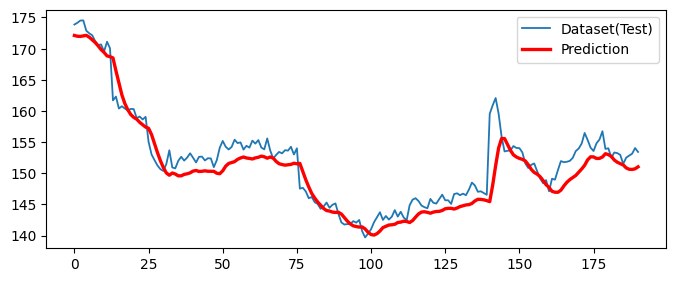

In [ ]:
plt.figure(figsize=(12-4,3.1))
plt.plot(y_test_inv,lw=1.3,label='Dataset(Test)')
plt.plot(testPredict_inv,'r',lw=2.4,label='Prediction')
plt.legend()
plt.show()

------------------------------------
------------------------------------

#LSTM Test

In [ ]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(step,1),activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=40,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error',optimizer='rmsprop')
model.summary()

#model = Sequential()
#model.add(GRU(units=50,return_sequences=True,input_shape=(step,1),activation='relu'))
#model.add(Dropout(0.2))
#model.add(GRU(units=40,activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(units=1))

#model.compile(loss='mean_squared_error',optimizer='rmsprop')
#model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_5 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 40)                14560     
                                                                 
 dropout_6 (Dropout)         (None, 40)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 25001 (97.66 KB)
Trainable params: 25001 (97.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history =  model.fit(X_train,y_train,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
85/85 [==============================] - 7s 45ms/step - loss: 0.0207
Epoch 2/50
85/85 [==============================] - 4s 43ms/step - loss: 0.0074
Epoch 3/50
85/85 [==============================] - 5s 64ms/step - loss: 0.0065
Epoch 4/50
85/85 [==============================] - 4s 42ms/step - loss: 0.0058
Epoch 5/50
85/85 [==============================] - 4s 42ms/step - loss: 0.0051
Epoch 6/50
85/85 [==============================] - 5s 53ms/step - loss: 0.0051
Epoch 7/50
85/85 [==============================] - 4s 43ms/step - loss: 0.0047
Epoch 8/50
85/85 [==============================] - 4s 48ms/step - loss: 0.0043
Epoch 9/50
85/85 [==============================] - 5s 59ms/step - loss: 0.0043
Epoch 10/50
85/85 [==============================] - 4s 46ms/step - loss: 0.0042
Epoch 11/50
85/85 [==============================] - 4s 47ms/step - loss: 0.0038
Epoch 12/50
85/85 [==============================] - 5s 60ms/step - loss: 0.0038
Epoch 13/50
85/85 [==================

<function matplotlib.pyplot.show(close=None, block=None)>

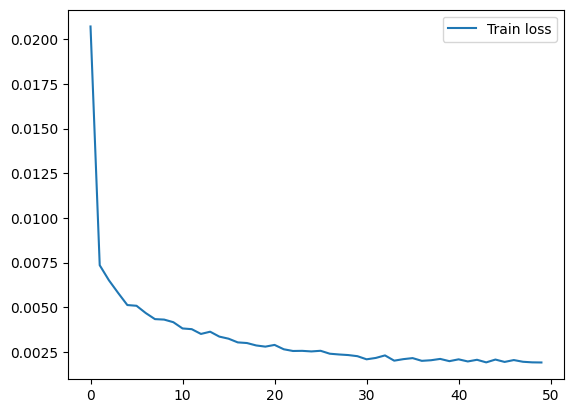

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.legend()
plt.show

In [ ]:
testPredict = model.predict(X_test)

6/6 [==============================] - 0s 15ms/step


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

testPredict_inv = sc.inverse_transform(testPredict)
y_test_inv = sc.inverse_transform(y_test)

r2_test = r2_score(y_test_inv,testPredict_inv)
rmse_test=np.sqrt(mean_squared_error(y_test_inv,testPredict_inv))

print('R2 Test: {:.3f}'.format(r2_test))
print('RMSE Test: {:.3f}'.format(rmse_test))

R2 Test: 0.822
RMSE Test: 3.135


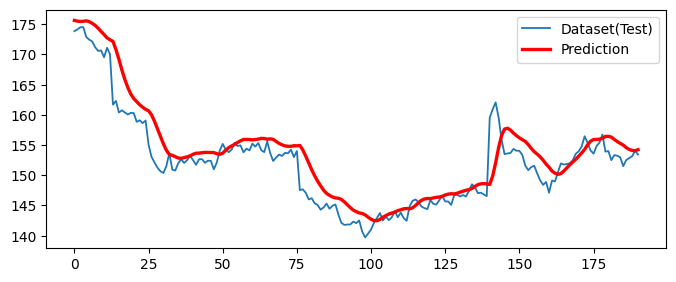

In [ ]:
plt.figure(figsize=(12-4,3.1))
plt.plot(y_test_inv,lw=1.3,label='Dataset(Test)')
plt.plot(testPredict_inv,'r',lw=2.4,label='Prediction')
plt.legend()
plt.show()